# Experimentation
I just want to try analyzing one song and see what I return.

In [14]:
import librosa
import numpy as np

audio_path = "../music/dont_call_me_angel.mp3"
x, sr = librosa.load(audio_path)

print(x.shape, sr)

/Users/aaronabraham/Documents/Programming/Python/SoundOff/env/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(4170816,) 22050


In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

Lets get into some visualization

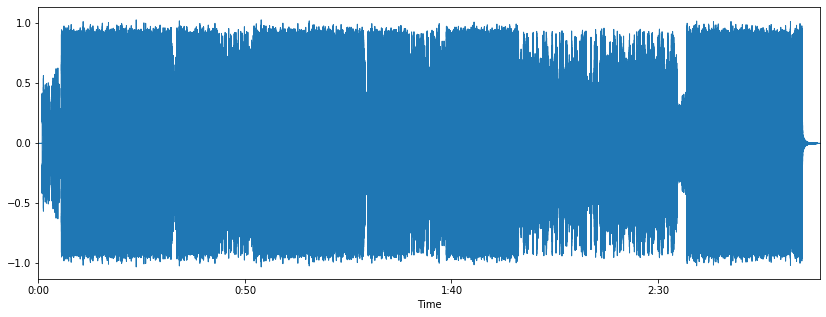

In [3]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

# Waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

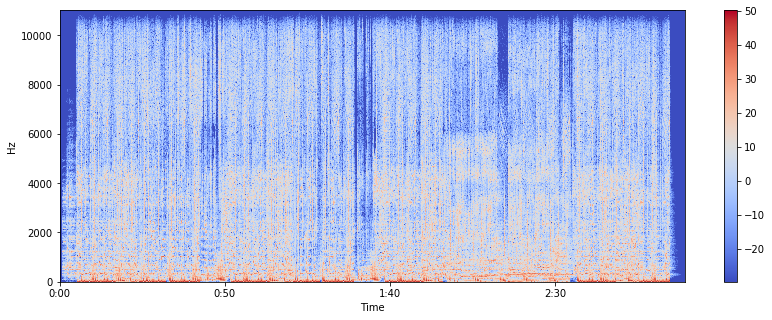

In [4]:
# Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

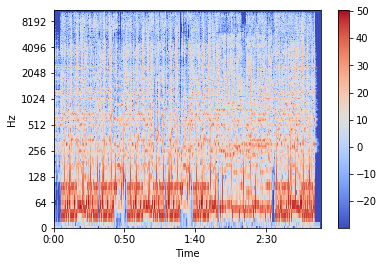

In [5]:
# Converting spectrogram to log as most of action is happening at lower frequencies
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Zero crossings: the number of times a signal switches from positive to negative in a given time frame. Higher sounds generally have more percursive sounds

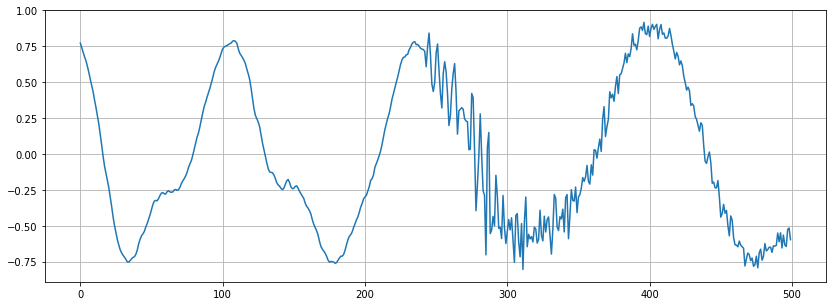

In [7]:
# Zero crossings
n0 = 1000000
n1 = 1000500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

15


Spectral centroid analysis: weighted average of the music frequency.

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis) # Not running because of inclusion of sklearn

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [15]:
spec_cent = librosa.feature.spectral_centroid(x, sr=sr)
print(np.mean(spec_cent))

2474.5597834457735


Spectral rolloff: which frequency is a set percentage of the spectral energy lie under?

In [16]:
spec_rolloff = librosa.feature.spectral_rolloff(x, sr)
print(np.mean(spec_rolloff))

5571.5359181293725


In [ ]:
Mel-frequency cepstral coefficients: